In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

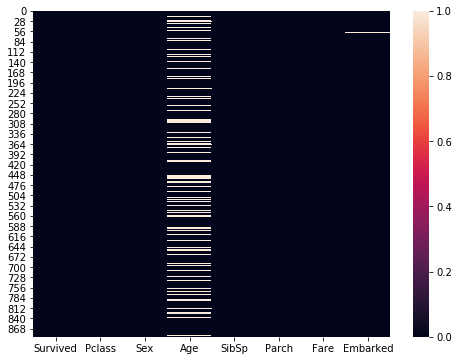

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull())

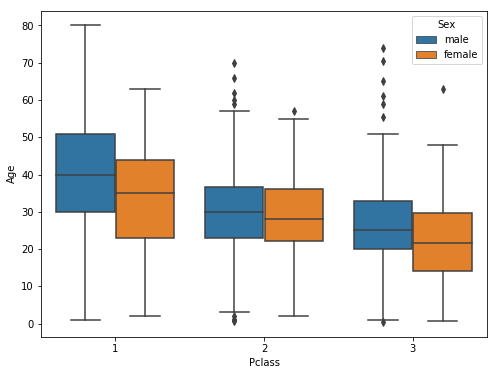

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=train.dropna(), hue='Sex')

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if Pclass == 1:
            if Sex == 'male':
                return 40
            else:
                return 35

        elif Pclass == 2:
            if Sex == 'male':
                return 30
            else:
                return 28

        else:
            if Sex == 'male':
                return 25
            else:
                return 21

    else:
        return Age

In [8]:
train['Age'] = train[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [9]:
train.dropna(inplace=True)

In [10]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [11]:
train = pd.concat([train,sex,embark],axis=1)

In [12]:
train.drop(['Embarked','Sex'], axis=1, inplace=True)

In [13]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
seq = Sequential()
seq.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
seq.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
seq.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
seq.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
X_train = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y_train = train['Survived']

In [17]:
seq.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
889/889 [==============================] - 4s 5ms/step - loss: 0.6884 - acc: 0.6175
Epoch 2/100
889/889 [==============================] - 0s 423us/step - loss: 0.6616 - acc: 0.6175
Epoch 3/100
889/889 [==============================] - 0s 417us/step - loss: 0.6297 - acc: 0.6175
Epoch 4/100
889/889 [==============================] - 0s 416us/step - loss: 0.6169 - acc: 0.6175
Epoch 5/100
889/889 [==============================] - 0s 426us/step - loss: 0.6098 - acc: 0.6175
Epoch 6/100
889/889 [==============================] - 0s 428us/step - loss: 0.6041 - acc: 0.6175
Epoch 7/100
889/889 [==============================] - 0s 422us/step - loss: 0.6001 - acc: 0.6513
Epoch 8/100
889/889 [==============================] - 0s 428us/step - loss: 0.5970 - acc: 0.6952
Epoch 9/100
889/889 [==============================] - 0s 427us/step - loss: 0.5931 - acc: 0.6907
Epoch 10/100
889/889 [==============================] - 0s 439us/step - loss: 0.5895 - acc: 0.6895
Epoch 11/100
889/889 

889/889 [==============================] - 0s 398us/step - loss: 0.4531 - acc: 0.7942
Epoch 84/100
889/889 [==============================] - 0s 404us/step - loss: 0.4525 - acc: 0.7987
Epoch 85/100
889/889 [==============================] - 0s 411us/step - loss: 0.4546 - acc: 0.7975
Epoch 86/100
889/889 [==============================] - 0s 416us/step - loss: 0.4531 - acc: 0.7998
Epoch 87/100
889/889 [==============================] - 0s 414us/step - loss: 0.4546 - acc: 0.7975
Epoch 88/100
889/889 [==============================] - 0s 415us/step - loss: 0.4557 - acc: 0.7874
Epoch 89/100
889/889 [==============================] - 0s 404us/step - loss: 0.4540 - acc: 0.7964
Epoch 90/100
889/889 [==============================] - 0s 413us/step - loss: 0.4487 - acc: 0.8009
Epoch 91/100
889/889 [==============================] - 0s 419us/step - loss: 0.4513 - acc: 0.7919
Epoch 92/100
889/889 [==============================] - 0s 413us/step - loss: 0.4530 - acc: 0.7987
Epoch 93/100
889/889 [=

In [18]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [19]:
test = pd.concat([test,sex,embark],axis=1)

In [20]:
X_test = test[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

In [21]:
y_pred = seq.predict(X_test)

In [22]:
y_pred

array([[0.0980269 ],
       [0.40071806],
       [0.08199354],
       [0.10223234],
       [0.6612994 ],
       [0.14923918],
       [0.6938772 ],
       [0.29268274],
       [0.77910703],
       [0.16766368],
       [0.83195245],
       [0.3995034 ],
       [0.83195245],
       [0.14063571],
       [0.7393873 ],
       [0.7625007 ],
       [0.1979557 ],
       [0.14820316],
       [0.5663606 ],
       [0.6120186 ],
       [0.27968422],
       [0.19707997],
       [0.83195245],
       [0.52046275],
       [0.7470182 ],
       [0.05657898],
       [0.83195245],
       [0.14265038],
       [0.43481746],
       [0.83195245],
       [0.19423097],
       [0.25438714],
       [0.55774   ],
       [0.83195245],
       [0.40537038],
       [0.15789768],
       [0.83195245],
       [0.716183  ],
       [0.11442041],
       [0.83195245],
       [0.24556436],
       [0.83195245],
       [0.06571507],
       [0.8093371 ],
       [0.7422315 ],
       [0.10230812],
       [0.41082683],
       [0.831

In [23]:
df_test = pd.DataFrame(pd.read_csv('test.csv'))

In [24]:
pass_id = df_test['PassengerId']

In [25]:
pass_id = pd.DataFrame(pass_id)

In [26]:
y_pred = pd.DataFrame(y_pred,columns={'Survived'})

In [27]:
y_pred = y_pred>0.5

In [28]:
y_pred['Survived'] = y_pred['Survived'].apply(lambda x: 1 if x == True else 0)

In [30]:
y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 3.3 KB


In [31]:
result = pd.concat([pass_id, y_pred], axis=1)

In [32]:
result.to_csv('result.csv', index=False)